# Australian Football League (AFL)

Australian Rules Football (AFL), using Machine Learning to identify who the key players are, predict performance and results.
Seasons 2012 to 2023
Each match identified by a unique 'gameId'
Progress scores at quarter time, half time and 3 quarter time breaks
Max & Min temperature on game day 


# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Import data

In [ ]:
df=pd.read_csv("C:\Users\91859\EDA_PROJECT\EDA1\football.csv")
print(df)

         GameId  Year Round        Date  MaxTemp  MinTemp  Rainfall  \
0     2012R0101  2012    R1  2012-03-24     24.0     12.2       0.0   
1     2012R0102  2012    R1  2012-03-29     25.7      9.7       0.0   
2     2012R0103  2012    R1  2012-03-30     27.4      9.7       0.0   
3     2012R0104  2012    R1  2012-03-31     29.1     15.1       0.6   
4     2012R0105  2012    R1  2012-03-31     28.2     19.7       0.0   
...         ...   ...   ...         ...      ...      ...       ...   
2442   2023SF01  2023    SF  2023-09-15     24.5     14.4       0.0   
2443   2023SF02  2023    SF  2023-09-16     24.0      7.6       0.0   
2444   2023PF01  2023    PF  2023-09-22     15.3      5.7       0.0   
2445   2023PF02  2023    PF  2023-09-23     24.1     14.2       0.0   
2446   2023GF01  2023    GF  2023-09-30     29.4     17.0       0.0   

                  Venue StartTime Attendance  ... HomeTeamScoreHT  \
0     Stadium Australia   7:20 PM     38,203  ...             3.3   
1        

# Display first 20 rows

In [4]:
df.head(20)

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,HomeTeamScoreHT,HomeTeamScore3QT,HomeTeamScoreFT,HomeTeamScore,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore
0,2012R0101,2012,R1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,"38,203",...,3.3,3.40,5.70,37,Sydney,4.1,8.4,13.80,14.16,100
1,2012R0102,2012,R1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,"78,285",...,5.6,10.70,12.90,81,Carlton,3.2,8.7,11.13,18.17,125
2,2012R0103,2012,R1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,"78,466",...,10.6,14.10,20.17,137,Collingwood,2.7,7.9,12.16,16.19,115
3,2012R0104,2012,R1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,"33,473",...,7.4,8.80,11.12,78,Brisbane Lions,1.4,7.8,13.13,17.17,119
4,2012R0105,2012,R1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,"12,790",...,5.3,8.60,10.80,68,Adelaide,7.8,11.1,15.16,19.23,137
5,2012R0106,2012,R1,2012-03-31,24.0,9.0,0.0,Subiaco,4:45 PM,"34,601",...,8.3,12.80,16.90,105,Geelong,4.0,9.2,12.70,15.11,101
6,2012R0107,2012,R1,2012-03-31,29.1,15.1,0.6,Docklands,7:45 PM,"45,818",...,8.5,10.10,15.12,102,Essendon,3.2,9.8,13.14,14.20,104
7,2012R0108,2012,R1,2012-04-01,20.4,14.3,0.0,Docklands,1:10 PM,"24,977",...,8.5,10.11,12.15,87,West Coast,6.2,10.6,16.90,21.10,136
8,2012R0109,2012,R1,2012-04-01,24.3,11.8,0.0,Football Park,4:10 PM,"21,179",...,8.6,11.90,13.11,89,St Kilda,2.1,9.3,11.40,13.70,85
9,2012R0201,2012,R2,2012-04-05,28.4,17.9,0.0,Gabba,7:40 PM,"25,913",...,7.6,7.70,9.90,63,Carlton,5.5,10.9,16.10,23.16,154


# Display last 20 rows

In [5]:
df.tail(20)

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,HomeTeamScoreHT,HomeTeamScore3QT,HomeTeamScoreFT,HomeTeamScore,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore
2427,2023R2308,2023,R23,2023-08-20,18.7,12.3,0.0,M.C.G.,3:20 PM,"50,142",...,6.50,10.60,13.90,87,Hawthorn,4.2,6.30,8.50,9.60,60
2428,2023R2309,2023,R23,2023-08-20,19.9,7.0,0.0,Perth Stadium,2:40 PM,"38,360",...,4.70,5.80,8.10,58,Port Adelaide,2.3,6.40,9.60,11.80,74
2429,2023R2401,2023,R24,2023-08-25,21.0,10.4,0.0,M.C.G.,7:50 PM,"74,344",...,2.40,2.10,3.13,31,Collingwood,8.1,12.20,14.30,16.50,101
2430,2023R2402,2023,R24,2023-08-26,14.6,10.3,0.1,M.C.G.,1:45 PM,"27,951",...,4.10,7.40,8.80,56,Fremantle,3.4,8.60,11.80,14.90,93
2431,2023R2403,2023,R24,2023-08-26,12.1,4.1,0.6,Bellerive Oval,1:45 PM,"4,378",...,7.60,13.70,20.12,132,Gold Coast,4.2,8.60,10.90,14.13,97
2432,2023R2404,2023,R24,2023-08-26,24.1,11.8,0.0,Gabba,4:35 PM,"31,689",...,4.11,7.11,9.18,72,St Kilda,3.1,3.30,7.50,9.60,60
2433,2023R2405,2023,R24,2023-08-26,13.9,9.4,0.0,Kardinia Park,7:25 PM,"20,533",...,7.11,10.13,11.13,79,Western Bulldogs,3.1,6.20,10.50,16.80,104
2434,2023R2406,2023,R24,2023-08-26,24.3,9.5,0.0,Perth Stadium,6:10 PM,"47,027",...,8.30,12.40,12.60,78,Adelaide,4.5,5.10,11.17,17.21,123
2435,2023R2407,2023,R24,2023-08-27,16.0,9.1,0.0,Adelaide Oval,12:00 PM,"39,860",...,6.70,8.13,13.16,94,Richmond,3.4,5.11,7.13,8.15,63
2436,2023R2408,2023,R24,2023-08-27,20.8,9.8,0.0,S.C.G.,3:20 PM,"41,753",...,3.80,7.12,7.14,56,Melbourne,3.2,5.40,7.80,11.11,77


# Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GameId            2447 non-null   object 
 1   Year              2447 non-null   int64  
 2   Round             2447 non-null   object 
 3   Date              2447 non-null   object 
 4   MaxTemp           2440 non-null   float64
 5   MinTemp           2440 non-null   float64
 6   Rainfall          2425 non-null   float64
 7   Venue             2447 non-null   object 
 8   StartTime         2447 non-null   object 
 9   Attendance        2447 non-null   object 
 10  HomeTeam          2447 non-null   object 
 11  HomeTeamScoreQT   2447 non-null   float64
 12  HomeTeamScoreHT   2447 non-null   float64
 13  HomeTeamScore3QT  2447 non-null   float64
 14  HomeTeamScoreFT   2447 non-null   float64
 15  HomeTeamScore     2447 non-null   int64  
 16  AwayTeam          2447 non-null   object 


# Ploting boxplot

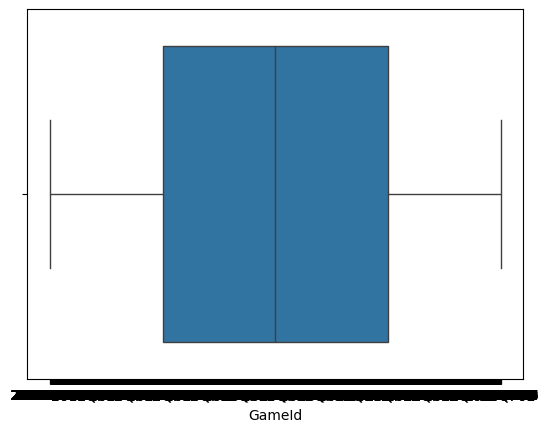

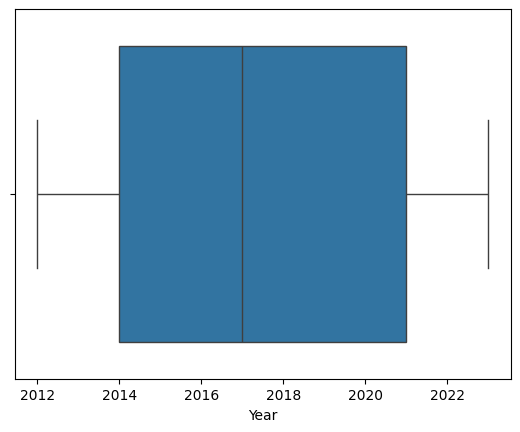

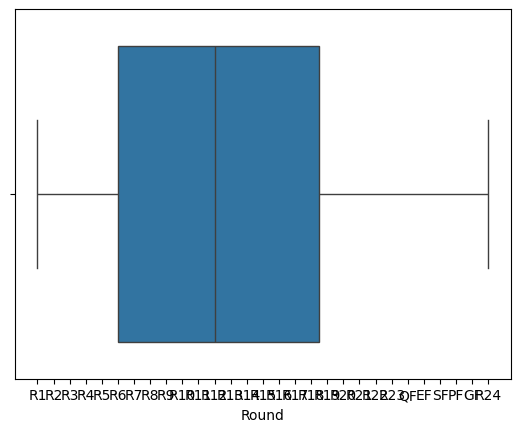

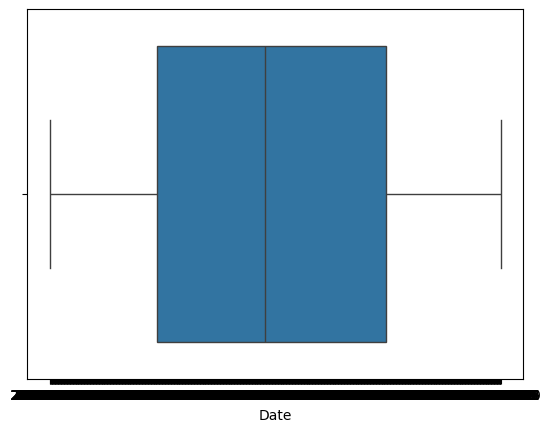

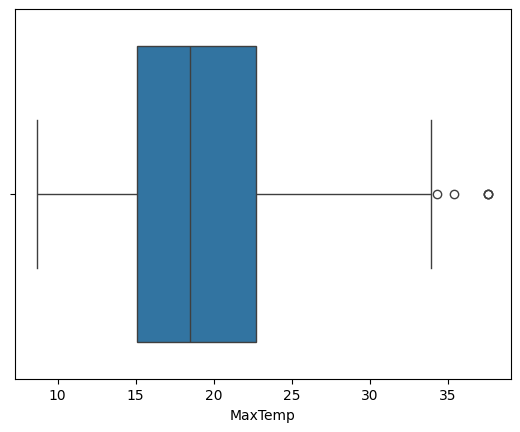

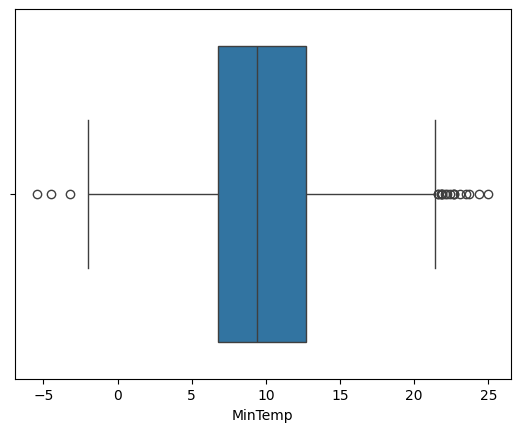

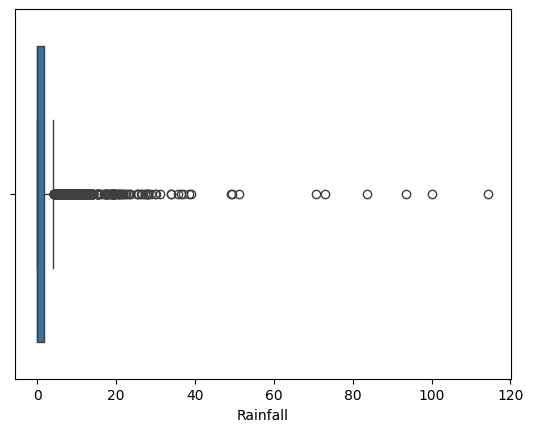

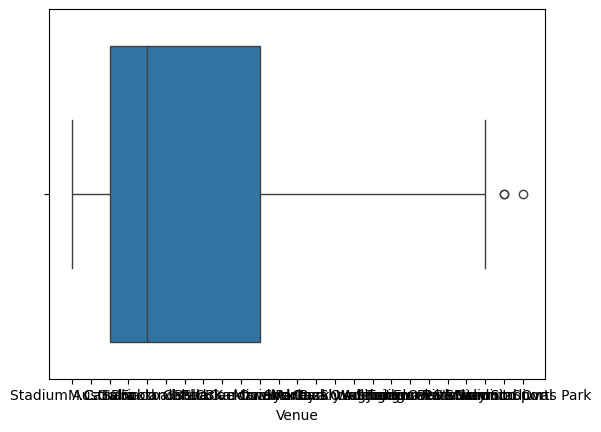

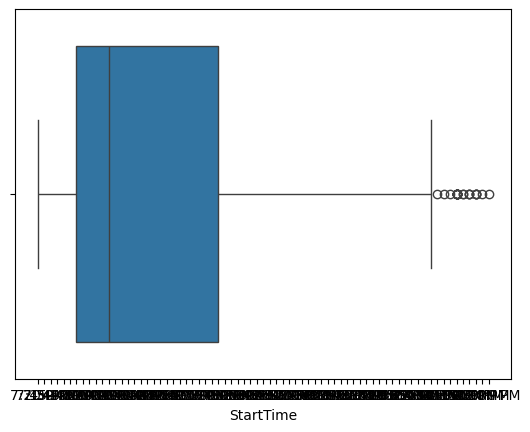

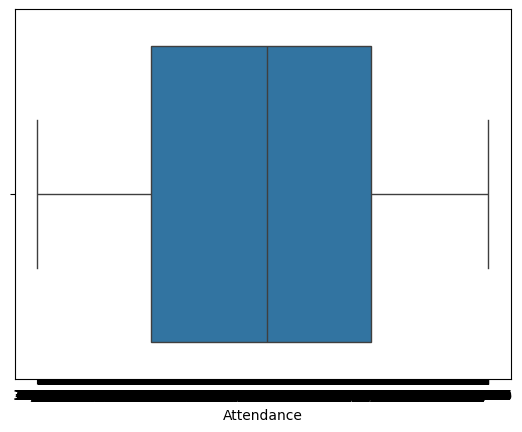

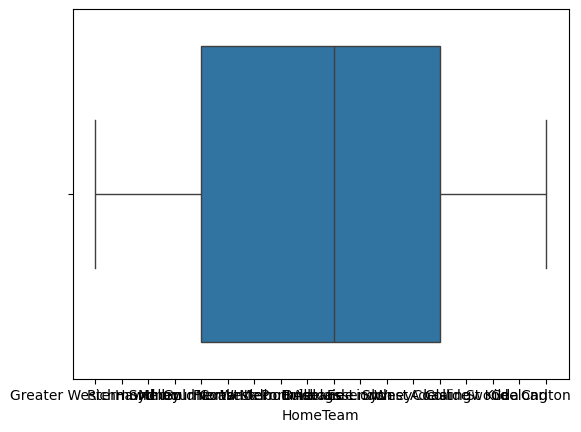

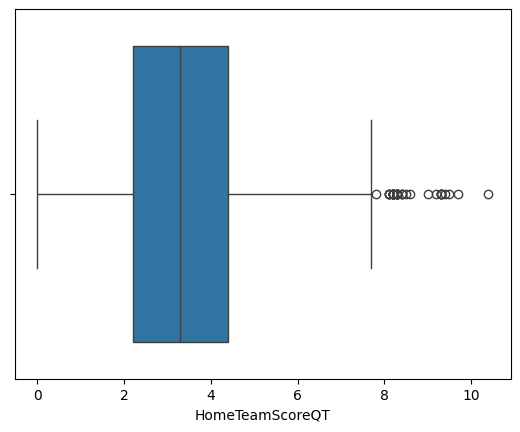

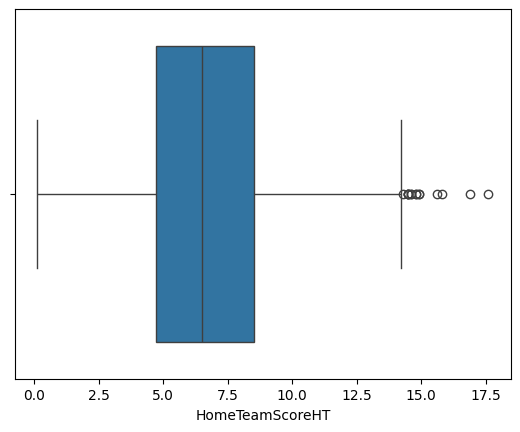

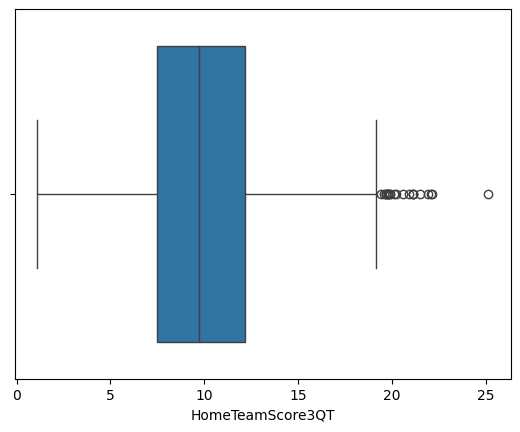

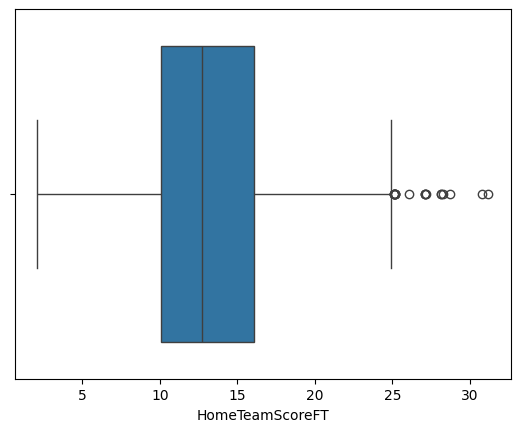

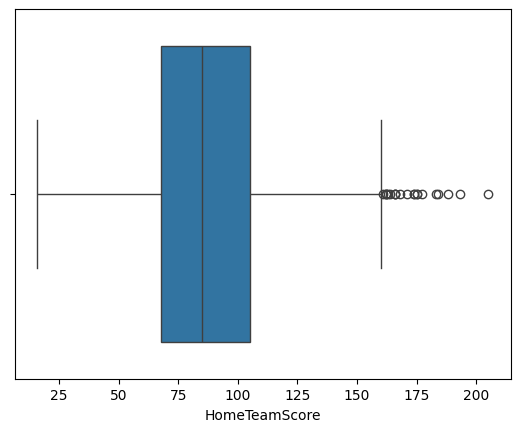

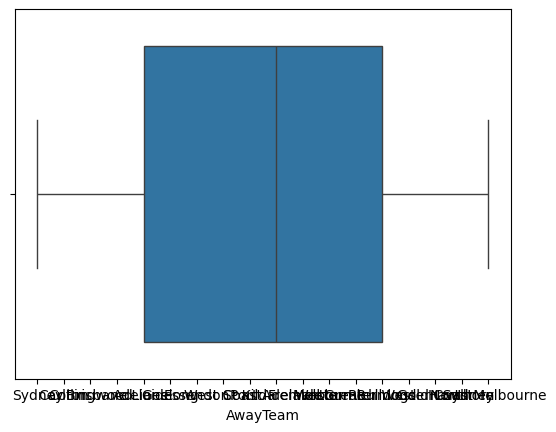

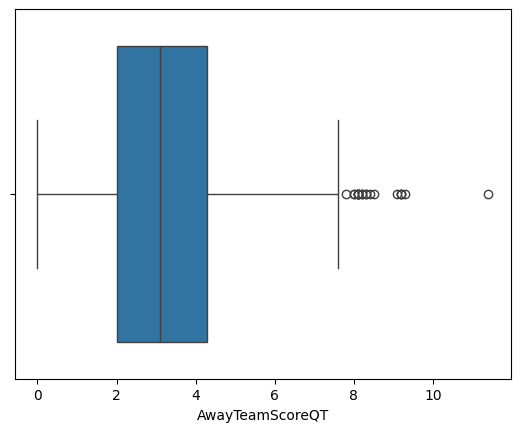

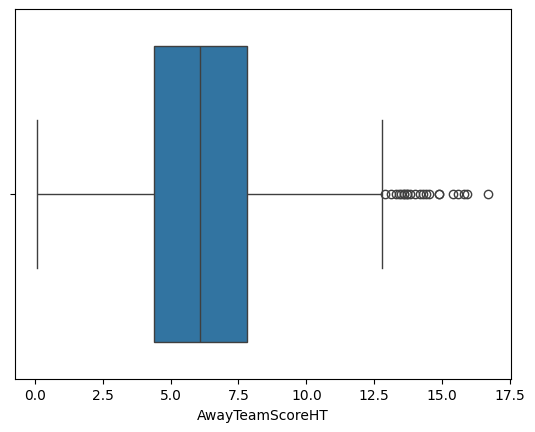

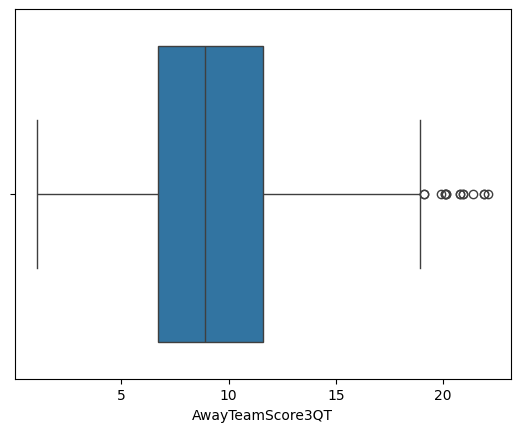

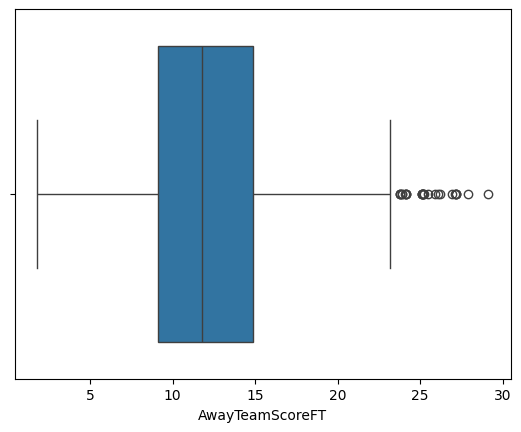

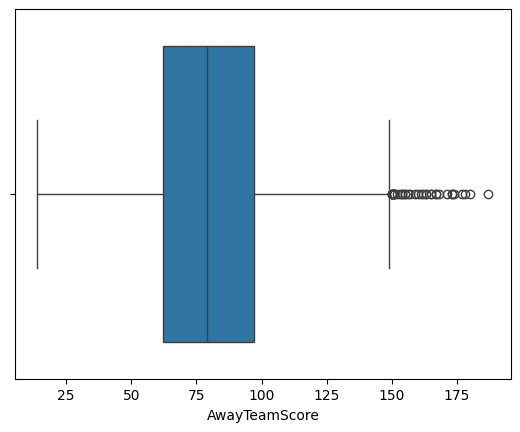

In [7]:
import seaborn as sns
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

# Description

1. GameId: Unique identifier for the game.


2. Year: Year of the game.


3. Round: Round of the competition.


4. Date: Date of the game.


5. MaxTemp: Maximum temperature on the day of the game.


6. MinTemp: Minimum temperature on the day of the game.


7. Rainfall: Rainfall recorded on the day of the game.


8. Venue: Venue where the game was held.


9. StartTime: Start time of the game.


10. Attendance: Number of attendees.


11. HomeTeam: Home team name.


12. HomeTeamScoreQT: Home team score at the first quarter.


13. HomeTeamScoreHT: Home team score at halftime.


14. HomeTeamScore3QT: Home team score at the third quarter.


15. HomeTeamScoreFT: Home team score at full-time.


16. HomeTeamScore: Total score of the home team.


17. AwayTeam: Away team name.


18. AwayTeamScoreQT: Away team score at the first quarter.


19. AwayTeamScoreHT: Away team score at halftime.


20. AwayTeamScore3QT: Away team score at the third quarter.


21. AwayTeamScoreFT: Away team score at full-time.


22. AwayTeamScore: Total score of the away team

# Cleaning data

### Empty cells

In [ ]:
df.isna().sum()

GameId               0
Year                 0
Round                0
Date                 0
MaxTemp              7
MinTemp              7
Rainfall            22
Venue                0
StartTime            0
Attendance           0
HomeTeam             0
HomeTeamScoreQT      0
HomeTeamScoreHT      0
HomeTeamScore3QT     0
HomeTeamScoreFT      0
HomeTeamScore        0
AwayTeam             0
AwayTeamScoreQT      0
AwayTeamScoreHT      0
AwayTeamScore3QT     0
AwayTeamScoreFT      0
AwayTeamScore        0
dtype: int64

### remove null values

In [9]:
df.fillna(2,inplace=True)
print(df)

         GameId  Year Round        Date  MaxTemp  MinTemp  Rainfall  \
0     2012R0101  2012    R1  2012-03-24     24.0     12.2       0.0   
1     2012R0102  2012    R1  2012-03-29     25.7      9.7       0.0   
2     2012R0103  2012    R1  2012-03-30     27.4      9.7       0.0   
3     2012R0104  2012    R1  2012-03-31     29.1     15.1       0.6   
4     2012R0105  2012    R1  2012-03-31     28.2     19.7       0.0   
...         ...   ...   ...         ...      ...      ...       ...   
2442   2023SF01  2023    SF  2023-09-15     24.5     14.4       0.0   
2443   2023SF02  2023    SF  2023-09-16     24.0      7.6       0.0   
2444   2023PF01  2023    PF  2023-09-22     15.3      5.7       0.0   
2445   2023PF02  2023    PF  2023-09-23     24.1     14.2       0.0   
2446   2023GF01  2023    GF  2023-09-30     29.4     17.0       0.0   

                  Venue StartTime Attendance  ... HomeTeamScoreHT  \
0     Stadium Australia   7:20 PM     38,203  ...             3.3   
1        

In [10]:
df.isna().sum()

GameId              0
Year                0
Round               0
Date                0
MaxTemp             0
MinTemp             0
Rainfall            0
Venue               0
StartTime           0
Attendance          0
HomeTeam            0
HomeTeamScoreQT     0
HomeTeamScoreHT     0
HomeTeamScore3QT    0
HomeTeamScoreFT     0
HomeTeamScore       0
AwayTeam            0
AwayTeamScoreQT     0
AwayTeamScoreHT     0
AwayTeamScore3QT    0
AwayTeamScoreFT     0
AwayTeamScore       0
dtype: int64

# Checking Datatype

In [11]:
df.dtypes

GameId               object
Year                  int64
Round                object
Date                 object
MaxTemp             float64
MinTemp             float64
Rainfall            float64
Venue                object
StartTime            object
Attendance           object
HomeTeam             object
HomeTeamScoreQT     float64
HomeTeamScoreHT     float64
HomeTeamScore3QT    float64
HomeTeamScoreFT     float64
HomeTeamScore         int64
AwayTeam             object
AwayTeamScoreQT     float64
AwayTeamScoreHT     float64
AwayTeamScore3QT    float64
AwayTeamScoreFT     float64
AwayTeamScore         int64
dtype: object

# Changing Datatypes

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes


GameId                      object
Year                         int64
Round                       object
Date                datetime64[ns]
MaxTemp                    float64
MinTemp                    float64
Rainfall                   float64
Venue                       object
StartTime                   object
Attendance                  object
HomeTeam                    object
HomeTeamScoreQT            float64
HomeTeamScoreHT            float64
HomeTeamScore3QT           float64
HomeTeamScoreFT            float64
HomeTeamScore                int64
AwayTeam                    object
AwayTeamScoreQT            float64
AwayTeamScoreHT            float64
AwayTeamScore3QT           float64
AwayTeamScoreFT            float64
AwayTeamScore                int64
dtype: object

In [13]:
df['StartTime']=pd.to_datetime(df['StartTime'])
df.dtypes

C:\Users\91859\AppData\Local\Temp\ipykernel_2008\4102733218.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartTime']=pd.to_datetime(df['StartTime'])


GameId                      object
Year                         int64
Round                       object
Date                datetime64[ns]
MaxTemp                    float64
MinTemp                    float64
Rainfall                   float64
Venue                       object
StartTime           datetime64[ns]
Attendance                  object
HomeTeam                    object
HomeTeamScoreQT            float64
HomeTeamScoreHT            float64
HomeTeamScore3QT           float64
HomeTeamScoreFT            float64
HomeTeamScore                int64
AwayTeam                    object
AwayTeamScoreQT            float64
AwayTeamScoreHT            float64
AwayTeamScore3QT           float64
AwayTeamScoreFT            float64
AwayTeamScore                int64
dtype: object

In [14]:
del df['MaxTemp']
del df['MinTemp']
del df['Rainfall']
print(df)

         GameId  Year Round       Date              Venue           StartTime  \
0     2012R0101  2012    R1 2012-03-24  Stadium Australia 2024-12-10 19:20:00   
1     2012R0102  2012    R1 2012-03-29             M.C.G. 2024-12-10 19:45:00   
2     2012R0103  2012    R1 2012-03-30             M.C.G. 2024-12-10 19:50:00   
3     2012R0104  2012    R1 2012-03-31             M.C.G. 2024-12-10 13:45:00   
4     2012R0105  2012    R1 2012-03-31            Carrara 2024-12-10 15:45:00   
...         ...   ...   ...        ...                ...                 ...   
2442   2023SF01  2023    SF 2023-09-15             M.C.G. 2024-12-10 19:50:00   
2443   2023SF02  2023    SF 2023-09-16      Adelaide Oval 2024-12-10 19:10:00   
2444   2023PF01  2023    PF 2023-09-22             M.C.G. 2024-12-10 19:50:00   
2445   2023PF02  2023    PF 2023-09-23              Gabba 2024-12-10 17:15:00   
2446   2023GF01  2023    GF 2023-09-30             M.C.G. 2024-12-10 14:30:00   

     Attendance            

In [15]:
df.isna().sum()

GameId              0
Year                0
Round               0
Date                0
Venue               0
StartTime           0
Attendance          0
HomeTeam            0
HomeTeamScoreQT     0
HomeTeamScoreHT     0
HomeTeamScore3QT    0
HomeTeamScoreFT     0
HomeTeamScore       0
AwayTeam            0
AwayTeamScoreQT     0
AwayTeamScoreHT     0
AwayTeamScore3QT    0
AwayTeamScoreFT     0
AwayTeamScore       0
dtype: int64

## Correlation,Covariance,Describe

In [16]:
print(df.describe())

              Year                           Date  \
count  2447.000000                           2447   
mean   2017.475276  2017-12-07 21:19:56.076828672   
min    2012.000000            2012-03-24 00:00:00   
25%    2014.000000            2014-09-02 12:00:00   
50%    2017.000000            2017-08-25 00:00:00   
75%    2021.000000            2021-03-30 00:00:00   
max    2023.000000            2023-09-30 00:00:00   
std       3.477780                            NaN   

                           StartTime  HomeTeamScoreQT  HomeTeamScoreHT  \
count                           2447      2447.000000      2447.000000   
mean   2024-12-10 16:36:01.176951296         3.436167         6.736036   
min              2024-12-10 12:00:00         0.000000         0.120000   
25%              2024-12-10 14:10:00         2.200000         4.700000   
50%              2024-12-10 16:35:00         3.300000         6.500000   
75%              2024-12-10 19:20:00         4.400000         8.500000   
max 

In [17]:
numeric_columns = ['HomeTeamScoreQT','HomeTeamScoreHT','HomeTeamScore3QT','HomeTeamScoreFT']
numeric_data =df[numeric_columns]
print(numeric_data)

      HomeTeamScoreQT  HomeTeamScoreHT  HomeTeamScore3QT  HomeTeamScoreFT
0                 1.2              3.3              3.40             5.70
1                 3.4              5.6             10.70            12.90
2                 2.1             10.6             14.10            20.17
3                 3.3              7.4              8.80            11.12
4                 3.1              5.3              8.60            10.80
...               ...              ...               ...              ...
2442              3.3              4.7              7.11             9.17
2443              4.1              5.6              8.70             9.16
2444              2.2              2.6              7.70             8.10
2445              1.2              6.6              9.90            11.13
2446              4.4              9.9             10.15            12.18

[2447 rows x 4 columns]


In [18]:
correlation_matrix = numeric_data.corr()
covariance_matrix = numeric_data.cov()
print(correlation_matrix)
print(covariance_matrix)

                  HomeTeamScoreQT  HomeTeamScoreHT  HomeTeamScore3QT  \
HomeTeamScoreQT          1.000000         0.744271          0.640494   
HomeTeamScoreHT          0.744271         1.000000          0.852336   
HomeTeamScore3QT         0.640494         0.852336          1.000000   
HomeTeamScoreFT          0.592938         0.780100          0.902838   

                  HomeTeamScoreFT  
HomeTeamScoreQT          0.592938  
HomeTeamScoreHT          0.780100  
HomeTeamScore3QT         0.902838  
HomeTeamScoreFT          1.000000  
                  HomeTeamScoreQT  HomeTeamScoreHT  HomeTeamScore3QT  \
HomeTeamScoreQT          3.199538         3.585909          4.036532   
HomeTeamScoreHT          3.585909         7.255200          8.088818   
HomeTeamScore3QT         4.036532         8.088818         12.413643   
HomeTeamScoreFT          4.607663         9.128565         13.819341   

                  HomeTeamScoreFT  
HomeTeamScoreQT          4.607663  
HomeTeamScoreHT          9

### Questions

1)most common venue used in the dataset

In [19]:
import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv") #load dataset
common_venue=df['Venue'].mode()[0] #mode= frequently occuring value,[0]=extract first value
print(common_venue)

M.C.G.


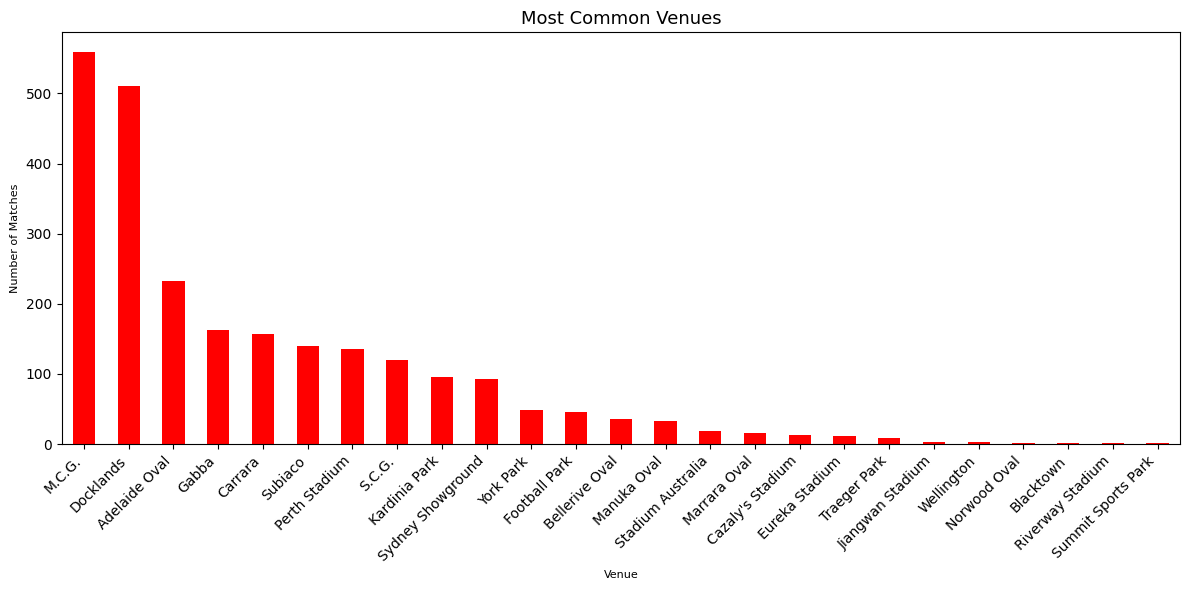

In [20]:
 
venue_counts = df['Venue'].value_counts()
plt.figure(figsize=(12, 6))
venue_counts.plot(kind='bar', color='red')
plt.title('Most Common Venues', fontsize=13)
plt.xlabel('Venue', fontsize=8)
plt.ylabel('Number of Matches', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2)How many games played in each year

In [21]:

year=df['Year'].value_counts().sort_index() #value_counts=occuring each unique value in the "year"column,index=counts are sorted by year
print(year)

Year
2012    207
2013    207
2014    207
2015    206
2016    207
2017    207
2018    207
2019    207
2020    162
2021    207
2022    207
2023    216
Name: count, dtype: int64


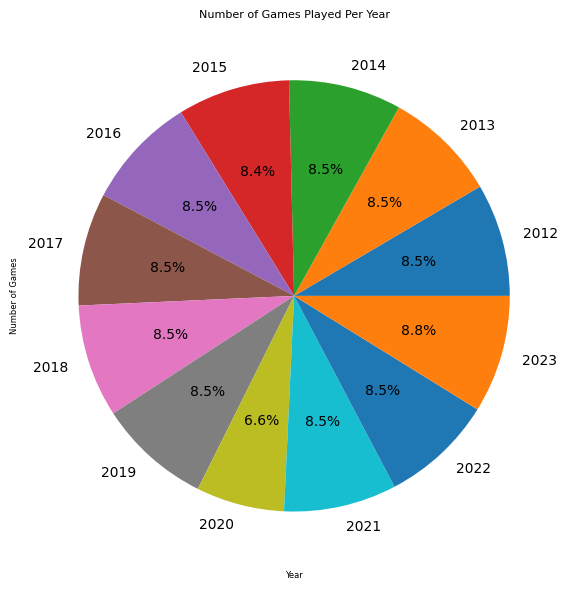

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv") #load dataset
games_year=df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
games_year.plot(kind='pie',autopct='%1.1f%%', color='lightgreen')
plt.title('Number of Games Played Per Year', fontsize=8)
plt.xlabel('Year', fontsize=6)
plt.ylabel('Number of Games', fontsize=6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




3)what is the average attendance accross all games

In [23]:

df['Attendance']=pd.to_numeric(df['Attendance'].str.replace(',','')) #numeric()=contert att col=numeric,(',','')=removing comma
avrg_att=df['Attendance'].mean() #mean=average
print(avrg_att)

31394.401716387412


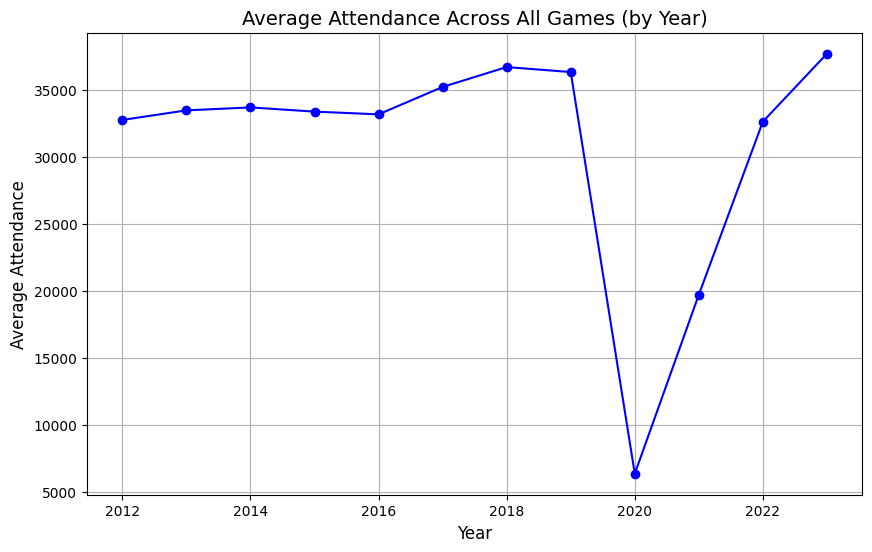

In [24]:
average_attendance = df.groupby('Year')['Attendance'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_attendance.index, average_attendance.values, marker='o', linestyle='-', color='b')
plt.title('Average Attendance Across All Games (by Year)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.grid(True)
plt.show()

4)Which game had the highest att

In [25]:
import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")
df['Attendance']=df['Attendance'].str.replace(',','').astype(int)
highest_att_row=df.loc[df['Attendance'].idxmax()]# idxmax=index of the row with highest value in att,loc=details of that row
print("Game with the highest attendance:")
print(f"Game ID: {highest_att_row['GameId']}")
print(f"Attendance: {highest_att_row['Attendance']}")
print(f"Venue: {highest_att_row['Venue']}")
print(f"Year: {highest_att_row['Year']}")

Game with the highest attendance:
Game ID: 2022GF01
Attendance: 100024
Venue: M.C.G.
Year: 2022


5)Which teams had the highest scores as HomeTeam

In [26]:

ht_scores=df.groupby('HomeTeam')['HomeTeamScore'].sum()
ht_scoring_team=ht_scores.idxmax()
highest_score=ht_scores.max()
print(ht_scoring_team)
print(highest_score)

Geelong
14258


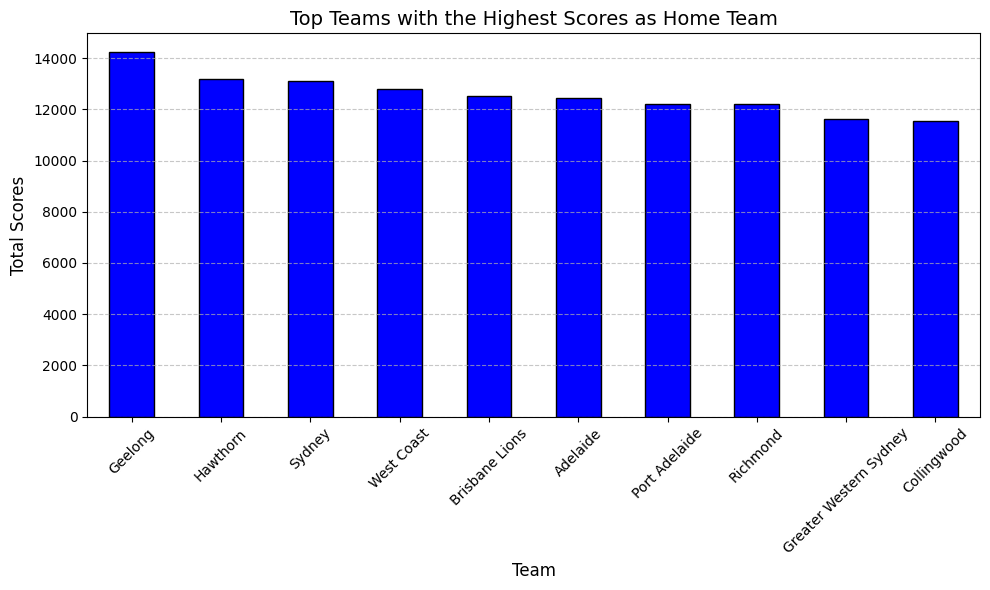

In [27]:
home_team_scores = df.groupby('HomeTeam')['HomeTeamScore'].sum().sort_values(ascending=False)
top_home_teams = home_team_scores.head(10)
plt.figure(figsize=(10, 6))
top_home_teams.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top Teams with the Highest Scores as Home Team', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Scores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

6)Which teams had the highest scores as AwayTeam

In [28]:

at_scores=df.groupby('AwayTeam')['AwayTeamScore'].sum()
highest_scoring_team=at_scores.idxmax()
highest_score=at_scores.max()
print(highest_scoring_team)
print(highest_score)

Hawthorn
12379


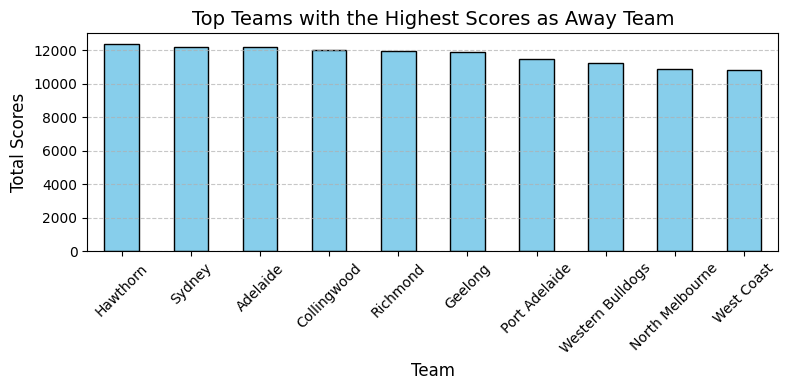

In [29]:
away_team_scores = df.groupby('AwayTeam')['AwayTeamScore'].sum().sort_values(ascending=False)
top_away_teams = away_team_scores.head(10)
plt.figure(figsize=(8, 4))
top_away_teams.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Teams with the Highest Scores as Away Team', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Scores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

7)Which round had the highest total attendance

In [31]:
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")
df['Attendance'] = df['Attendance'].str.replace(',', '').astype(float) #attendance in numeric
round_attendance = df.groupby('Round')['Attendance'].sum() #group by round,and calculate total attendance
highest_attendance_round = round_attendance.idxmax()
highest_attendance = round_attendance.max()
print(highest_attendance_round)
print(highest_attendance)



R1
3857479.0


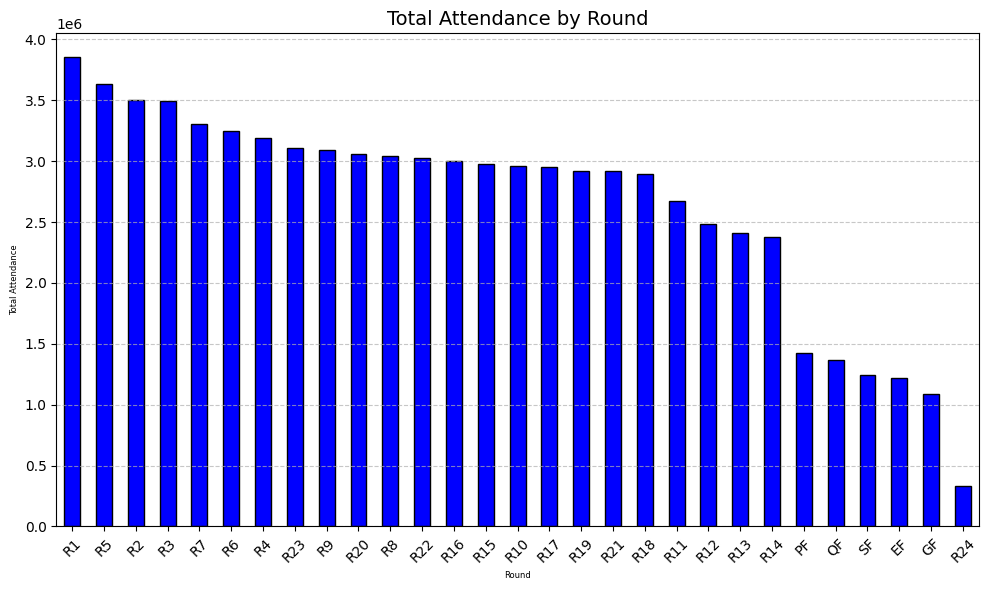

In [ ]:
round_attendance = df.groupby('Round')['Attendance'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
round_attendance.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Attendance by Round', fontsize=14)
plt.xlabel('Round', fontsize=6)
plt.ylabel('Total Attendance', fontsize=6)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8)Which game had the largest margin of victory #marginofvictory=diff b/w home and away scoes


In [ ]:

df['MarginOfVictory'] = abs(df['HomeTeamScore'] - df['AwayTeamScore'])#add a new column margin of victory
largest_margin_game = df.loc[df['MarginOfVictory'].idxmax()]#idxmax=locate the row with the highest margin of victory
print("The game with the largest margin of victory:")
print(f"Home Team: {largest_margin_game['HomeTeam']} ({largest_margin_game['HomeTeamScore']})")
print(f"Away Team: {largest_margin_game['AwayTeam']} ({largest_margin_game['AwayTeamScore']})")
print(f"Margin of Victory: {largest_margin_game['MarginOfVictory']}")
print(f"Venue: {largest_margin_game['Venue']}")
print(f"Date: {largest_margin_game['Date']}")


The game with the largest margin of victory:
Home Team: Sydney (205)
Away Team: West Coast (34)
Margin of Victory: 171
Venue: S.C.G.
Date: 2023-06-24


9)What is the distribution of game start times

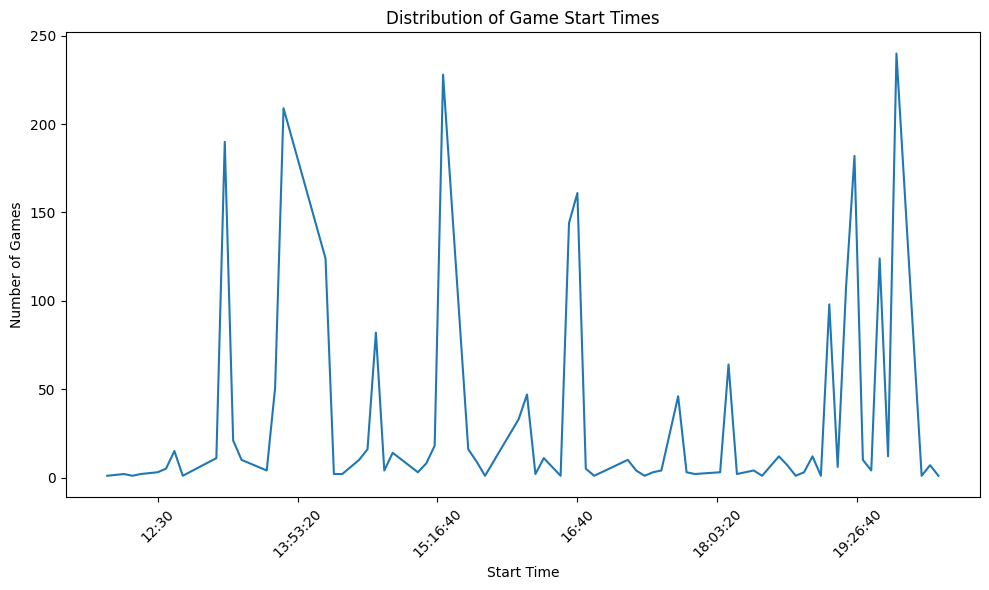

In [ ]:

df['StartTime'] = pd.to_datetime(df['StartTime'], format='%I:%M %p', errors='coerce').dt.time # convert start to proper format
start_time_distribution = df['StartTime'].value_counts().sort_index() #value counts =how many games occured at each start time
plt.figure(figsize=(10, 6))# plot distribution
start_time_distribution.plot(kind='line')
plt.title('Distribution of Game Start Times')
plt.xlabel('Start Time')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10)how many games ended with a score difference of less than 10 points

In [ ]:

df['MarginOfVictory'] = abs(df['HomeTeamScore'] - df['AwayTeamScore']) # new column
close_games = df[df['MarginOfVictory'] < 10]#mov is less than 10
print(f"Number of games with a score difference of less than 10 points: {len(close_games)}")
print("Games with score differences of less than 10 points:")
print(close_games[['HomeTeam', 'AwayTeam', 'HomeTeamScore', 'AwayTeamScore', 'MarginOfVictory', 'Venue', 'Date']])



Number of games with a score difference of less than 10 points: 470
Games with score differences of less than 10 points:
             HomeTeam                AwayTeam  HomeTeamScore  AwayTeamScore  \
5           Fremantle                 Geelong            105            101   
6     North Melbourne                Essendon            102            104   
8       Port Adelaide                St Kilda             89             85   
17            Geelong                Hawthorn             92             90   
31         West Coast                Hawthorn             51             46   
...               ...                     ...            ...            ...   
2438      Collingwood               Melbourne             60             53   
2439          Carlton                  Sydney             74             68   
2442        Melbourne                 Carlton             71             73   
2444      Collingwood  Greater Western Sydney             58             57   
2446      

11)which team had the highest total score across all games

In [ ]:

home_scores = df.groupby('HomeTeam')['HomeTeamScore'].sum()#calculate total score for each team
away_scores = df.groupby('AwayTeam')['AwayTeamScore'].sum()
total_scores = home_scores.add(away_scores, fill_value=0)
highest_scoring_team = total_scores.idxmax()
highest_score = total_scores.max()
print(highest_scoring_team)
print(highest_score)


Geelong
26121


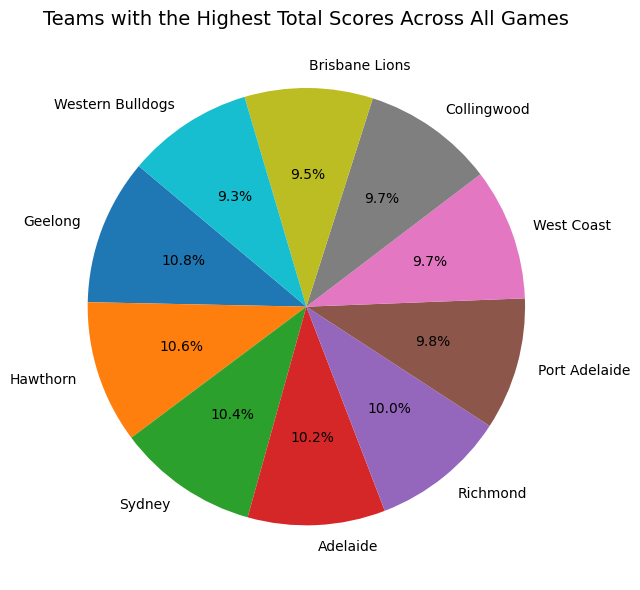

In [ ]:
total_scores = (
    df.groupby('HomeTeam')['HomeTeamScore'].sum() +
    df.groupby('AwayTeam')['AwayTeamScore'].sum()
).sort_values(ascending=False)
top_teams_scores = total_scores.head(10)
plt.figure(figsize=(8, 6))
plt.pie(
    top_teams_scores, 
    labels=top_teams_scores.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab10.colors
)
plt.title('Teams with the Highest Total Scores Across All Games', fontsize=14)
plt.tight_layout()
plt.show()


12)how many games ended in same away and home teams score

In [ ]:
import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")
tied_games = df[df['HomeTeamScore'] == df['AwayTeamScore']]
print(tied_games)



         GameId  Year Round        Date  MaxTemp  MinTemp  Rainfall  \
196   2012R2308  2012   R23  2012-09-02     18.3      2.7       0.0   
275   2013R0806  2013    R8  2013-05-18     20.1      9.2       0.0   
604   2014R2302  2014   R23  2014-08-30     20.5      9.0       0.0   
769   2015R1806  2015   R18  2015-08-01     23.2     11.9       0.0   
795   2015R2105  2015   R21  2015-08-22     19.3      9.9       0.0   
1155  2017R1505  2017   R15  2017-07-01     17.1      3.2       0.0   
1161  2017R1602  2017   R16  2017-07-08     11.7      1.7       0.4   
1194  2017R1908  2017   R19  2017-07-30     17.8     10.4       0.0   
1278  2018R0502  2018    R5  2018-04-21     24.6     10.8       0.0   
1664  2020R0201  2020    R2  2020-06-11     16.2      3.0       0.0   
1749  2020R1108  2020   R11  2020-08-12     23.0     13.2       0.0   
1926  2021R1305  2021   R13  2021-06-13     15.3     11.6       3.4   
1965  2021R1805  2021   R18  2021-07-17     12.8      6.4       0.8   
2007  

13)which venue hosted the most games

In [ ]:
import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")
most_frequent_venue = df['Venue'].value_counts().idxmax()
games_hosted = df['Venue'].value_counts().max()
print(most_frequent_venue)
print(games_hosted)




M.C.G.
559


14)compare hometeam awayteam which team perform well

In [ ]:
import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")
df['WinningTeam'] = df.apply(
    lambda row: 'HomeTeam' if row['HomeTeamScore'] > row['AwayTeamScore'] else (
        'AwayTeam' if row['AwayTeamScore'] > row['HomeTeamScore'] else 'Draw'
    ),
    axis=1
)
performance_comparison = df['WinningTeam'].value_counts()
print("Performance Comparison:")
print(performance_comparison)
if performance_comparison['HomeTeam'] > performance_comparison['AwayTeam']:
    print("Overall, the home team performed better.")
elif performance_comparison['HomeTeam'] < performance_comparison['AwayTeam']:
    print("Overall, the away team performed better.")
else:
    print("Overall, the performance is tied.")


Performance Comparison:
WinningTeam
HomeTeam    1376
AwayTeam    1054
Draw          17
Name: count, dtype: int64
Overall, the home team performed better.


15)what is the distribution of game start times

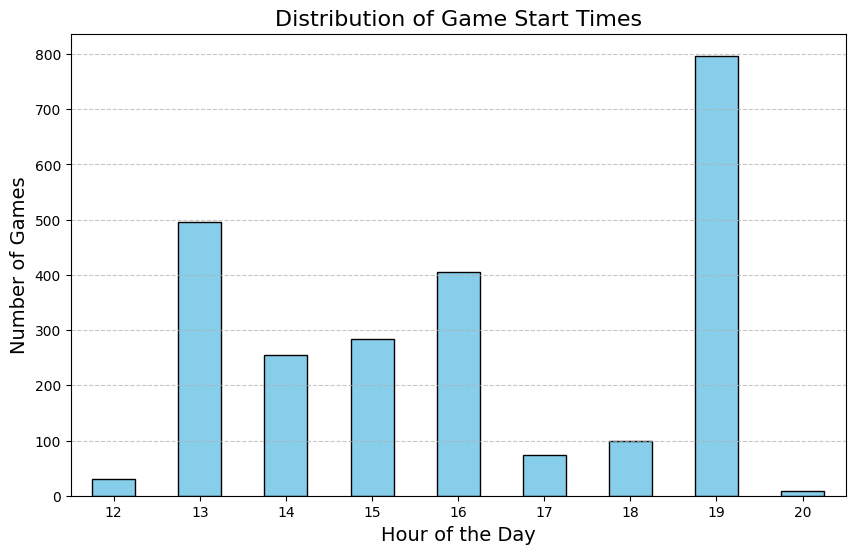

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")


# Convert the 'StartTime' column to datetime format
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%I:%M %p')

# Extract the hour of the day
df['StartHour'] = df['StartTime'].dt.hour

# Plot the distribution of game start times
plt.figure(figsize=(10, 6))
df['StartHour'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Game Start Times', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


16)What is the most common start time for football matches, and how does it vary across different venues?

In [ ]:

import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\PROJECT\\football.csv")
# Convert 'StartTime' to a standardized datetime format
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%I:%M %p')

# Extract the hour and minute of the start time
df['StartTimeFormatted'] = df['StartTime'].dt.strftime('%I:%M %p')

# Find the most common start time overall
most_common_start_time = df['StartTimeFormatted'].mode()[0]
print(f"The most common start time overall is: {most_common_start_time}")

# Group by venue and find the most common start time for each venue
common_start_time_by_venue = df.groupby('Venue')['StartTimeFormatted'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()
common_start_time_by_venue.columns = ['Venue', 'MostCommonStartTime']

# Display the results
print("\nMost common start times by venue:")
print(common_start_time_by_venue)

# Save the results to a CSV file (optional)
output_path = 'most_common_start_time_by_venue.csv'
common_start_time_by_venue.to_csv(output_path, index=False)
print(f"\nResults saved to {output_path}")


The most common start time overall is: 07:50 PM

Most common start times by venue:
                 Venue MostCommonStartTime
0        Adelaide Oval            07:10 PM
1       Bellerive Oval            01:45 PM
2            Blacktown            01:10 PM
3              Carrara            04:35 PM
4     Cazaly's Stadium            04:40 PM
5            Docklands            07:50 PM
6       Eureka Stadium            01:45 PM
7        Football Park            04:10 PM
8                Gabba            07:40 PM
9     Jiangwan Stadium            01:15 PM
10       Kardinia Park            01:45 PM
11              M.C.G.            03:20 PM
12         Manuka Oval            01:45 PM
13        Marrara Oval            07:10 PM
14        Norwood Oval            02:50 PM
15       Perth Stadium            06:10 PM
16    Riverway Stadium            01:45 PM
17              S.C.G.            07:50 PM
18   Stadium Australia            07:20 PM
19             Subiaco            02:40 PM
20  Summit Spo

### SUMMARY

From the initial inspection ,data  contains 2,447 rows and 22 columns

Columns:

Match details: GameId, Year, Round, Date, Venue, StartTime, Attendance.

Weather: MaxTemp, MinTemp, Rainfall.

Team performance: Scores for home and away teams at different time points (quarterly, half-time, final score).

Teams: HomeTeam, AwayTeam.

1. GameId: Unique identifier for the game.
2. Year: Year of the game.
3. Round: Round of the competition.
4. Date: Date of the game.
5. MaxTemp: Maximum temperature on the day of the game.
6. MinTemp: Minimum temperature on the day of the game.
7. Rainfall: Rainfall recorded on the day of the game.
8. Venue: Venue where the game was held.
9. StartTime: Start time of the game.
10. Attendance: Number of attendees.
11. HomeTeam: Home team name.
12. HomeTeamScoreQT: Home team score at the first quarter.
13. HomeTeamScoreHT: Home team score at halftime.
14. HomeTeamScore3QT: Home team score at the third quarter.
15. HomeTeamScoreFT: Home team score at full-time.
16. HomeTeamScore: Total score of the home team.
17. AwayTeam: Away team name.
18. AwayTeamScoreQT: Away team score at the first quarter.
19. AwayTeamScoreHT: Away team score at halftime.
20. AwayTeamScore3QT: Away team score at the third quarter.
21. AwayTeamScoreFT: Away team score at full-time.
22. AwayTeamScore: Total score of the away team

Key Characteristics:

Missing values in MaxTemp, MinTemp, and Rainfall columns.Attendance is recorded as strings with commas, requiring conversion for numerical analysis.
Scores are detailed, providing opportunities for granular analysis.

here first we find the common venue in dataset for that Accesses the Venue column in the dataset, which contains the venue names for football matches.
.then Finds the mode (most frequent value) of the column. It returns a pandas Series containing the mode(s). If there are multiple modes, it will list all of them.
          next we find how many games plays in each year for that Accesses the Year column from the DataFrame (df), which contains the years associated with each football match. Counts the frequency of each unique value in the Year column.Sorts the resulting Series by the index (the years), ensuring the counts are ordered chronologically.
  
Then we find average  attendance across all games .first Cleaning and Converting the Attendance Column ,"df['Attendance']":Accesses the Attendance column in the DataFrame, which stores match attendance numbers as strings.Removes commas from the Attendance column using string replacement.For example, "78,285" becomes "78285"."Converts the cleaned strings into numeric data (integers or floats). second Calculating the Average Attendance ,Accesses the now-numeric Attendance column.Calculates the average of all values in the Attendance column.The mean is the sum of all attendance values divided by the number of matches.then print the result

         then we calculate which game had the highest gallary attendance and summarize that gameid  with 2022GF01  contains 100024  the highest attendance in 2022 venue at MCG.Geelong had the highest score from Hometeam and  Hawthorn had the highest score from away team,here we first calculate the total scores of awayteam and hometeam ,calculate the total score acheived by each team across all matches then print the result

The round R1 contains the highest attendance.Geelong contains the highest score across all the games .comparing both teams hometeam is slightly better in the games.      

#### future scope

1)Sports Analytics:

Analyze scoring trends based on team, venue, and weather conditions.Assess the impact of temperature and rainfall on match outcomes.
Determine patterns in attendance based on weather and match location.

2)Predictive Modeling:

Build models to predict match outcomes based on team performance and historical data.Use weather data to predict attendance or scoring behavior.

3)Venue Analysis:

Identify which venues attract more spectators or see higher scores.Analyze home advantage by comparing home and away scores.

4)Seasonal Trends:

Study performance trends across seasons or specific years.Explore the impact of early or late rounds on team success rates.

5)Data Enrichment:

Incorporate external data like player statistics, team rankings, or economic factors for deeper insights.